<a href="https://colab.research.google.com/github/marcinwolter/Autoencoder/blob/main/Autoencoder_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green'> **Outlier detection with autoencoders**

An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). An autoencoder learns two functions: an encoding function that transforms the input data, and a decoding function that recreates the input data from the encoded representation. The autoencoder learns an efficient representation (encoding) for a set of data, typically for dimensionality reduction.

<img src='https://stackabuse.s3.amazonaws.com/media/image-reconstruction-and-denoising-with-autoencoders-in-python-and-keras-3.png' width=500px>

# **Simple autoencoder**

In [2]:
import keras
from keras.datasets import mnist
from keras.datasets import fashion_mnist
import numpy as np
np.random.seed(10)

In [3]:
import numpy as np
from tensorflow.keras import layers
from keras.models import Model


# Read MNIST data

In [43]:
data = np.load("bkg_data.npy", allow_pickle=True)

In [44]:
keys = list(data.item().keys())

In [45]:
max_length = max([len(data.item().get(key)) for key in keys])
max_length

55532

In [46]:
traning_data = {}

for key in keys:
    traning_data[key] = data.item().get(key)

In [47]:
def padding_data(combo):
    for key in keys:
        combo[key] = np.pad(combo[key], (0, max_length - len(combo[key])), mode='constant', constant_values=0)
    return combo

In [48]:
training_data = padding_data(traning_data)

In [49]:
traning_matrix = np.array([values for values in traning_data.values()])

In [50]:
traning_matrix.shape

(285, 55532)

In [51]:
traning_matrix = traning_matrix.T

In [52]:
traning_matrix.shape

(55532, 285)

In [53]:
traning_matrix.shape

(55532, 285)

In [54]:
clean_matrix = traning_matrix[:,~np.all(np.isnan(traning_matrix), axis=0)]

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(clean_matrix, test_size=0.2, random_state=42)


In [56]:
"""(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255."""

'(x_train, y_train), (x_test, y_test) = mnist.load_data()\n\nx_train = x_train / 255.\nx_test = x_test / 255.'

# Reshape data (only if you use the fully connected network)

In [57]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

In [58]:
x_train.shape

(44425, 285)

In [59]:
x_test.shape

(11107, 285)

# Hyperparameters

In [214]:
encoding_dim = 60 # valid for fully connected network only
batch_size = 64
epochs = 100 #100

# **Fully connected autoencoder**

In [215]:
input_shape = x_train.shape[1]
# This is our input image
input_img = layers.Input(shape=(input_shape,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(518, activation='relu')(input_img)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dropout(0.05)(encoded)
encoded = layers.Dense(encoding_dim, activation='linear')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(518, activation='relu')(decoded)
decoded = layers.Dropout(0.05)(decoded)
decoded = layers.Dense(input_shape, activation='sigmoid')(decoded)


# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
#encoder = Model(input_img, encoded)

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 285)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 518)            │       148,148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 256)            │       132,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 60)             │         7,740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 518)            │       133,126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 518)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 285)            │       147,915 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,521 (2.45 MB)

 Trainable params: 643,521 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

# **Convolutional autoencoder**

Should work better than the fully connected one

In [216]:
'''
# Autoencoder with convolutional network
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()
'''

'\n# Autoencoder with convolutional network\ninput = layers.Input(shape=(28, 28, 1))\n\n# Encoder\nx = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)\nx = layers.MaxPooling2D((2, 2), padding="same")(x)\nx = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)\nx = layers.MaxPooling2D((2, 2), padding="same")(x)\n\n# Decoder\nx = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)\nx = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)\nx = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)\n\n# Autoencoder\nautoencoder = Model(input, x)\nautoencoder.compile(optimizer="adam", loss="binary_crossentropy")\nautoencoder.summary()\n'

# Train the autoencoder

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, x_test))

Epoch 1/100
695/695 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.5861 - val_loss: 0.5623
Epoch 2/100
695/695 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.5625 - val_loss: 0.5601
Epoch 3/100
695/695 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.5597 - val_loss: 0.5578
Epoch 4/100
695/695 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.5568 - val_loss: 0.5549
Epoch 5/100
695/695 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.5580 - val_loss: 0.5546
Epoch 6/100
695/695 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.5551 - val_loss: 0.5552
Epoch 7/100
695/695 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.5550 - val_loss: 0.5529
Epoch 8/100
695/695 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.5540 - val_loss: 0.5537
Epoch 9/100
695/695 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.5538 - val_loss: 0.5523
Epoch 10/100
695/695 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.5533 - val_loss: 0.5523
Epoch 11/100
695/695 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.5529 - val_loss: 0.5518
Epoch 12/100
695/695 ━━━━━━━━━━━━━━━━

# Plot history

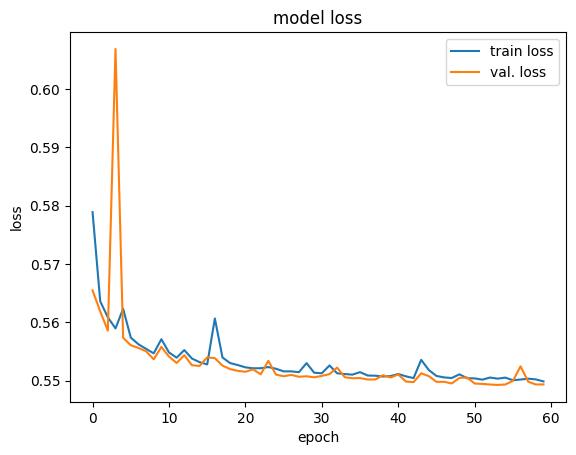

In [195]:
# summarize history for loss
import matplotlib.pyplot as plt

print(history)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','val. loss'], loc='upper right')
plt.show()

# Plot digits

In [196]:
decoded_data = autoencoder.predict(x_test)

348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [197]:
keys[0]

'lep_Pt_0'

In [198]:
def bins(n, list):
    bins = []

    list = sorted(list)

    last = list[-1]
    k = np.min(list)
    while k < last:
        bins.append(k)
        k += (last - list[0])/n


    return bins

In [199]:
def paint(key, m):
    biny = bins(m, decoded_data[key])
    plt.hist(decoded_data[key], bins=biny, color='blue')
    plt.hist(clean_matrix[key], bins=biny, color='green', alpha=0.5)
    plt.title(keys[key])
    plt.show()

In [200]:
decoded_data.shape

(11107, 285)

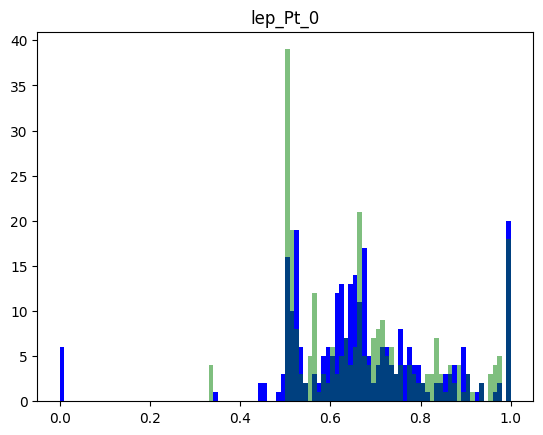

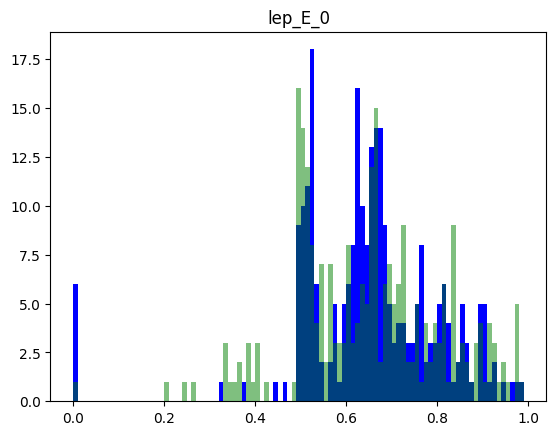

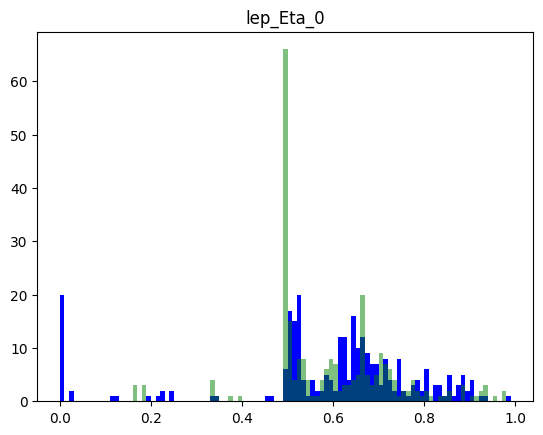

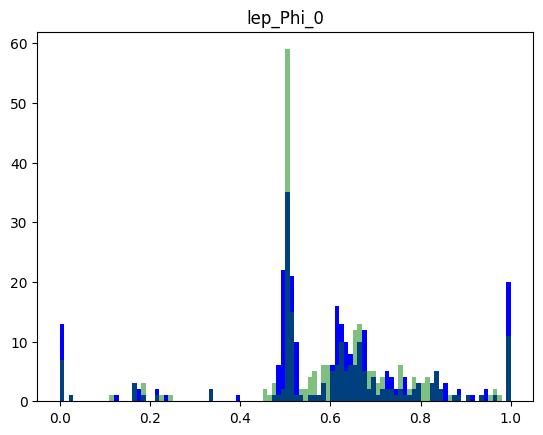

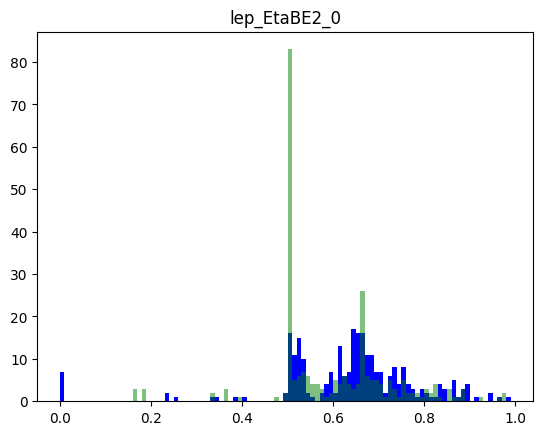

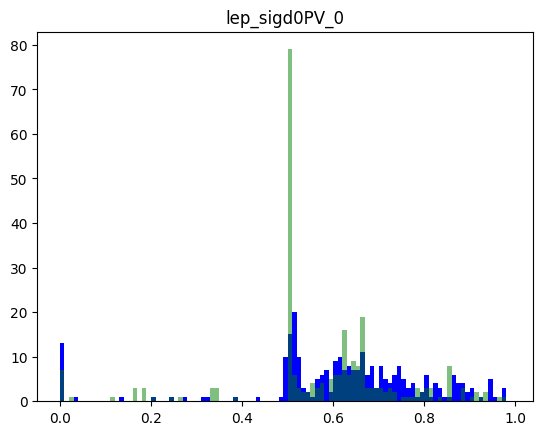

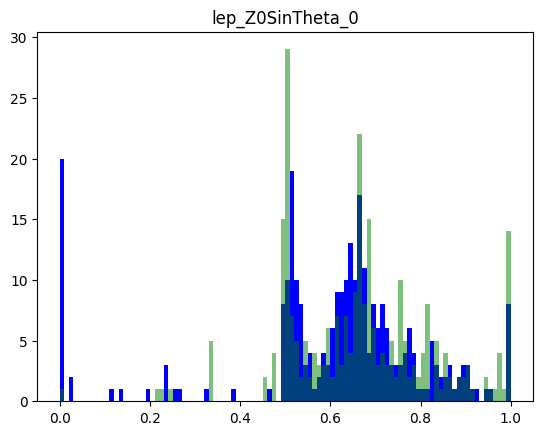

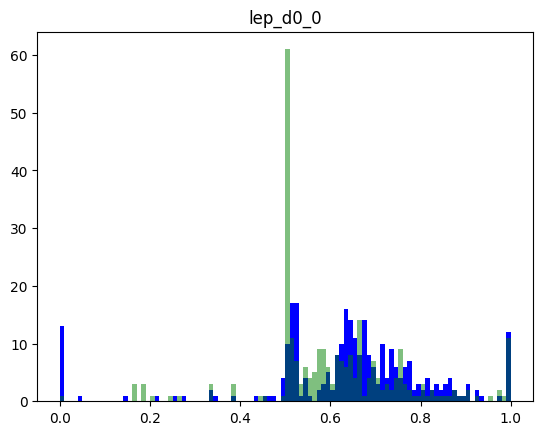

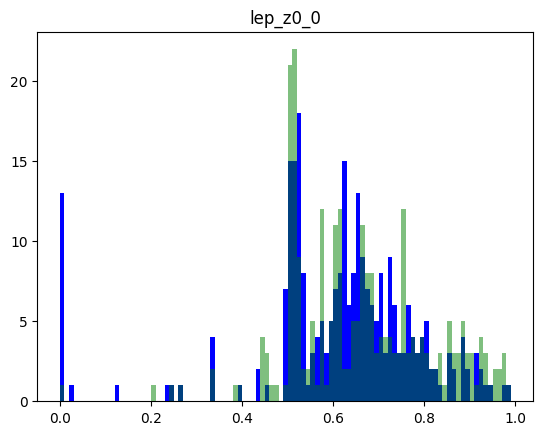

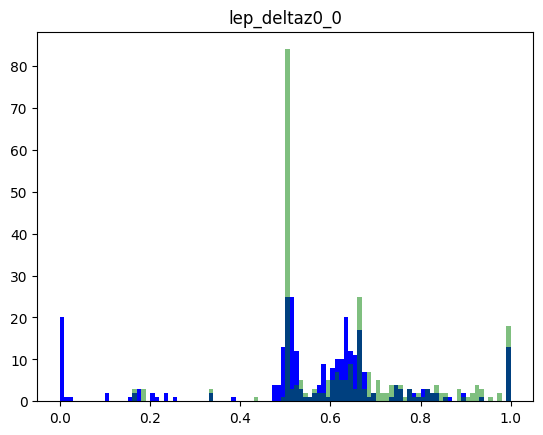

In [201]:
for i in range(len(keys[:10])):
    paint(i, 100)

348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


ValueError: cannot reshape array of size 285 into shape (28,28)

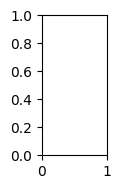

In [202]:
decoded_imgs = autoencoder.predict(x_test)

n = 20
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Read fashion mnist

In [203]:
(xf_train, yf_train), (xf_test, yf_test) = fashion_mnist.load_data()

xf_train = xf_train / 255.
xf_test = xf_test / 255.

In [204]:
data = np.load("signal_data.npy", allow_pickle=True)
keys = list(data.item().keys())
max_length = max([len(data.item().get(key)) for key in keys])
signal_data = {}

for key in keys:
    signal_data[key] = data.item().get(key)


def padding_data(combo):
    for key in keys:
        combo[key] = np.pad(combo[key], (0, max_length - len(combo[key])), mode='constant', constant_values=0)
    return combo


signal_data = padding_data(signal_data)
signal_matrix = np.array([values for values in signal_data.values()])
signal_matrix.shape

(285, 57098)

In [205]:
signal_matrix = signal_matrix.T

In [206]:
clean_signal_matrix = signal_matrix[:,~np.all(np.isnan(signal_matrix), axis=0)]


# Reshape fashion data (only if you use the fully connected network)

In [207]:
xf_train = xf_train.reshape((xf_train.shape[0], -1))
xf_test = xf_test.reshape((xf_test.shape[0], -1))

In [208]:
xs_train, xs_test = train_test_split(clean_signal_matrix, test_size=0.2, random_state=42)

# Plot fashion digits

357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


ValueError: cannot reshape array of size 285 into shape (28,28)

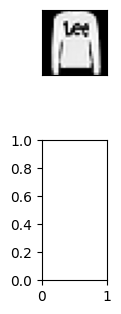

In [209]:
fashion_decoded_imgs = autoencoder.predict(xs_test)

n = 20
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(xf_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(fashion_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Calculate the losses for mnist digits and fasion mnist and plot a histogram

In [210]:
signal_output = autoencoder.predict(xs_test)


357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Reshape only if you use the convolutional autoencoder

In [211]:
#decoded_imgs = decoded_imgs.reshape((decoded_imgs.shape[0], -1))
#fashion_decoded_imgs = fashion_decoded_imgs.reshape((fashion_decoded_imgs.shape[0], -1))
#x_test = x_test.reshape((x_test.shape[0], -1))
#xf_test = xf_test.reshape((xf_test.shape[0], -1))

In [212]:
losses = keras.losses.mean_squared_error(decoded_data, x_test)
#print(losses[0:20])
fashion_losses = keras.losses.mean_squared_error(signal_output, xs_test)
#print(fashion_losses[0:20])

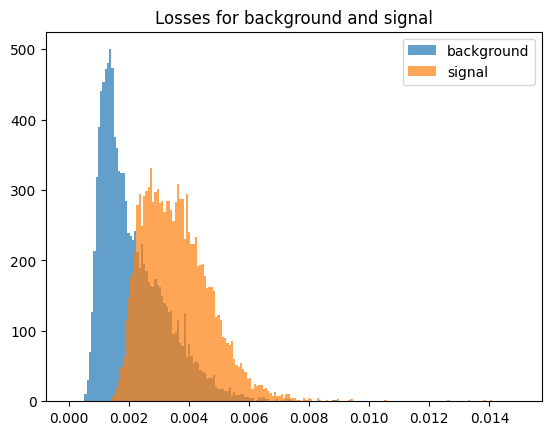

In [213]:
plt.hist(losses,bins=200,range=(0,0.015),label="background",alpha=0.7)
plt.hist(fashion_losses,bins=200,range=(0,0.015),label="signal",alpha=0.7)
plt.title("Losses for background and signal")
plt.legend()
#plt.yscale('log')
plt.savefig(f'518-128 E:{epochs}, bach:{batch_size}, dim:{encoding_dim}.png')
plt.show()

# Outlier detection

The autoencoder is trained on mnist hand-written digits. Therefore it does not reproduce the fashion elements well, therefore the losses are much higher than for mnist digits. Putting a cut on losses allows to identify the outliers.

### Remark
The autoencoder was never trained on "fashion" images.